In [1]:
import pandas as pd
import time
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB

In [2]:
df =  pd.read_csv('/kaggle/input/asthma-disease-dataset/asthma_disease_data.csv')
df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,...,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis,DoctorInCharge
0,5034,63,0,1,0,15.848744,0,0.894448,5.488696,8.701003,...,1.369051,4.941206,0,0,1,0,0,1,0,Dr_Confid
1,5035,26,1,2,2,22.757042,0,5.897329,6.341014,5.153966,...,2.197767,1.702393,1,0,0,1,1,1,0,Dr_Confid
2,5036,57,0,2,1,18.395396,0,6.739367,9.196237,6.840647,...,1.698011,5.022553,1,1,1,0,1,1,0,Dr_Confid
3,5037,40,1,2,1,38.515278,0,1.404503,5.826532,4.253036,...,3.032037,2.300159,1,0,1,1,1,0,0,Dr_Confid
4,5038,61,0,0,3,19.283802,0,4.604493,3.127048,9.625799,...,3.470589,3.067944,1,1,1,0,0,1,0,Dr_Confid


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PatientID               2392 non-null   int64  
 1   Age                     2392 non-null   int64  
 2   Gender                  2392 non-null   int64  
 3   Ethnicity               2392 non-null   int64  
 4   EducationLevel          2392 non-null   int64  
 5   BMI                     2392 non-null   float64
 6   Smoking                 2392 non-null   int64  
 7   PhysicalActivity        2392 non-null   float64
 8   DietQuality             2392 non-null   float64
 9   SleepQuality            2392 non-null   float64
 10  PollutionExposure       2392 non-null   float64
 11  PollenExposure          2392 non-null   float64
 12  DustExposure            2392 non-null   float64
 13  PetAllergy              2392 non-null   int64  
 14  FamilyHistoryAsthma     2392 non-null   

In [4]:
df.describe()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,...,GastroesophagealReflux,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,...,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,6229.500000,42.137960,0.493311,0.669732,1.307274,27.244877,0.141722,5.051786,5.022867,7.019012,...,0.158027,2.548564,3.741270,0.596154,0.500418,0.503344,0.503344,0.602425,0.604933,0.051839
std,690.655244,21.606655,0.500060,0.986120,0.898242,7.201628,0.348838,2.903574,2.909980,1.732475,...,0.364842,0.861809,1.303689,0.490770,0.500104,0.500093,0.500093,0.489499,0.488967,0.221749
min,5034.000000,5.000000,0.000000,0.000000,0.000000,15.031803,0.000000,0.001740,0.003031,4.001437,...,0.000000,1.000459,1.500045,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5631.750000,23.000000,0.000000,0.000000,1.000000,20.968313,0.000000,2.578333,2.432043,5.498500,...,0.000000,1.824113,2.607489,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6229.500000,42.000000,0.000000,0.000000,1.000000,27.052202,0.000000,5.016881,5.115383,6.975839,...,0.000000,2.553244,3.734982,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
75%,6827.250000,61.000000,1.000000,1.000000,2.000000,33.555903,0.000000,7.540234,7.544216,8.526950,...,0.000000,3.292897,4.864121,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,7425.000000,79.000000,1.000000,3.000000,3.000000,39.985611,1.000000,9.995809,9.999904,9.996235,...,1.000000,3.999719,5.999421,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [6]:
data_cleaned = df.drop(columns=['PatientID', 'DoctorInCharge'])

In [7]:
# Defining features and target variable
X = data_cleaned.drop(columns=['Diagnosis'])
y = data_cleaned['Diagnosis']


In [8]:
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
# Initializing models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Naive Bayes': GaussianNB(),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42)
}

In [10]:
# Training and evaluating the models
model_results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    report = classification_report(y_test, y_pred, output_dict=True)
    model_results[name] = report

# Displaying classification reports for all models
model_results

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classif

{'Random Forest': {'0': {'precision': 0.9519832985386222,
   'recall': 1.0,
   'f1-score': 0.9754010695187166,
   'support': 456},
  '1': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 23},
  'accuracy': 0.9519832985386222,
  'macro avg': {'precision': 0.4759916492693111,
   'recall': 0.5,
   'f1-score': 0.4877005347593583,
   'support': 479},
  'weighted avg': {'precision': 0.9062722006964753,
   'recall': 0.9519832985386222,
   'f1-score': 0.9285655275585277,
   'support': 479}},
 'Decision Tree': {'0': {'precision': 0.9537037037037037,
   'recall': 0.9035087719298246,
   'f1-score': 0.927927927927928,
   'support': 456},
  '1': {'precision': 0.06382978723404255,
   'recall': 0.13043478260869565,
   'f1-score': 0.0857142857142857,
   'support': 23},
  'accuracy': 0.8663883089770354,
  'macro avg': {'precision': 0.5087667454688731,
   'recall': 0.5169717772692601,
   'f1-score': 0.5068211068211068,
   'support': 479},
  'weighted avg': {'precision': 0.910974893518313,
 

In [11]:
import matplotlib.pyplot as plt
import numpy as np

In [12]:

# Extracting metrics for comparison (accuracy, precision, recall, f1-score) for class '0' (majority class)
metrics = ['accuracy', 'precision', 'recall', 'f1-score']
model_names = list(model_results.keys())


In [13]:
# Gathering the metrics for plotting
accuracy = [model_results[model]['accuracy'] for model in model_names]
precision = [model_results[model]['0']['precision'] for model in model_names]
recall = [model_results[model]['0']['recall'] for model in model_names]
f1_score = [model_results[model]['0']['f1-score'] for model in model_names]

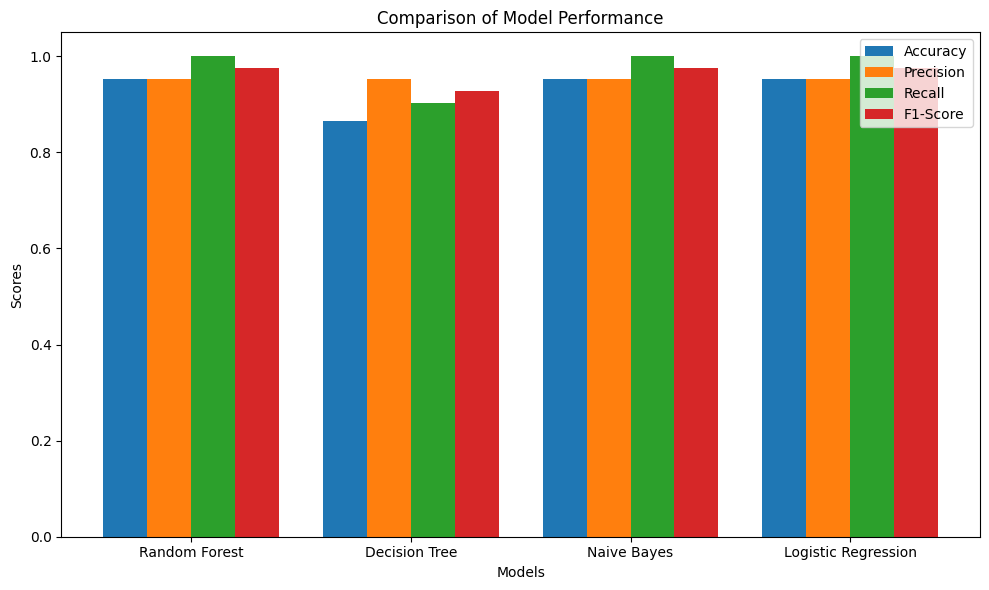

In [14]:


# Bar chart setup
x = np.arange(len(model_names))
width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))

# Plotting accuracy, precision, recall, and f1-score side by side
bars1 = ax.bar(x - 1.5 * width, accuracy, width, label='Accuracy')
bars2 = ax.bar(x - 0.5 * width, precision, width, label='Precision')
bars3 = ax.bar(x + 0.5 * width, recall, width, label='Recall')
bars4 = ax.bar(x + 1.5 * width, f1_score, width, label='F1-Score')

# Adding labels, title, and formatting
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Model Performance')
ax.set_xticks(x)
ax.set_xticklabels(model_names)
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()



The dataset contains 2,392 rows and 29 columns. Here are some key features:

Patient information: Age, Gender, Ethnicity, EducationLevel, BMI, etc.
Environmental factors: PollutionExposure, PollenExposure, etc.
Medical factors: LungFunctionFEV1, Wheezing, Coughing, etc.
Target: Diagnosis (likely representing asthma diagnosis, as it is binary).
the classification results for each model based on your dataset:

Random Forest:
Accuracy: 95.2%
High precision and recall for the majority class (0), but failed to predict the minority class (1).
Decision Tree:
Accuracy: 86.6%
Slightly lower performance than Random Forest, and struggled with predicting the minority class.
Naive Bayes:
Accuracy: 95.2%
Similar to Random Forest but also failed to predict the minority class (1).
Logistic Regression:
Accuracy: 95.2%
Good for the majority class but failed to predict the minority class (1).
It seems that the models are highly accurate for the majority class but struggle with the minority class. You may want to apply techniques like oversampling or SMOTE to improve the prediction of the minority class.